# Table of contents
1. [Regression](#introduction)
2. [Machine Learning Regression models](#listofmodels)
    1. [Simple Linear Regression](#SLR)
    2. [Multiple Linear Regression](#MLR)
    3. [Polynomial Regression](#PR)
    4. [Support Vector for Regression (SVR)](#SVR)
    5. [Decision Tree Regression](#DecisionTreeRegression)
    6. [Random Forest Regression](#RandomForestRegression)
3. [Other](#other)

# Regression  <a name="introduction"></a>

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

http://diamondclover.com/simple-linear-regression.html

In [ ]:
# important Libraries
import numpy as np # Help work with Multi-Dimensional data 
import pandas as pd # Allows organize and working with tabular data
import scipy # Python ecosystem with tools for scientific calculation (numpy, pandas and matplotlib are part of scipy), Mathematics, ML, Engineering
import statsmodels.api as sm
import matplotlib as plt #2D Plotting library
import seaborn as sns # package built on top of numpy and scipy, which also integrates with pandas. provide very good summaries unmatched for educational purposes.
import sklearn #most widely used machine learning libraries.

# Simple Linear Regression  <a name="SLR"></a>

Y (Dependent) variable should  be a function of the independent variable X.

Y= mX+b+e

<ul>
    <li>Y = Dependent variable</li>
    <li>X = independent variable</li>
    <li>m = Quantifies effect of X on Y</li>
    <li>b = constant</li>
    <li>e = error of estimation</li>
</ul>




 

In [2]:
## Import the relevant librariesimport numpy as np # Help work with Multi-Dimensional data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
#import seaborn as sns
#sns.set()

## Load the data
data = pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [3]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [22]:
data.iloc[:, 0]

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

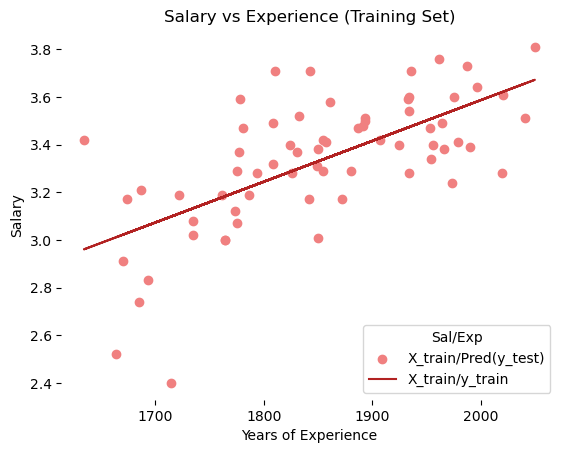

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Simple Linear Regression
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :1], data.iloc[:, 1:], test_size = 0.2, random_state = 0)

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

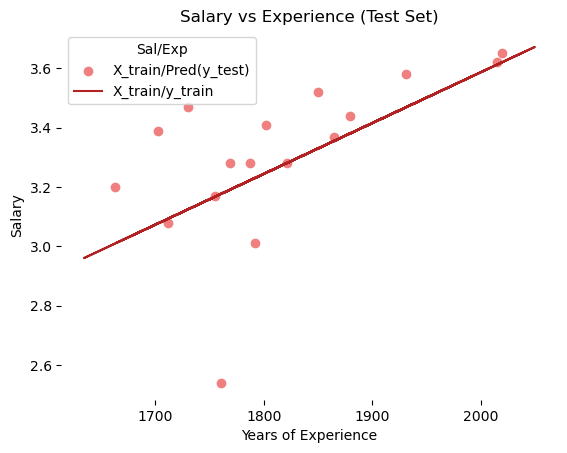

In [18]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [19]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[0.00171033]]
Intercept: [0.16586478]


#### Alternate method

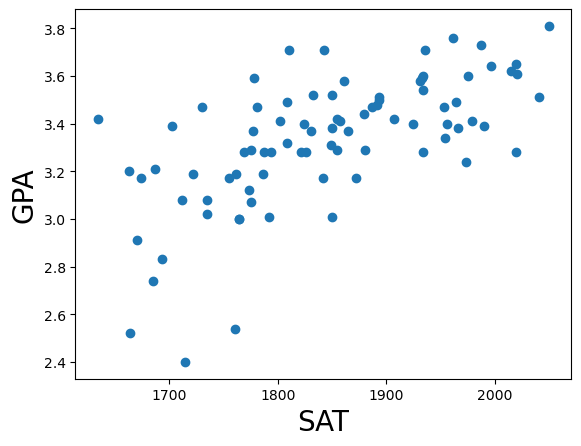

In [7]:
## Define the dependent and the independent variables
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

## Explore the data
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
#plt.legend(["x*2" , "x*3"])

# Show the plot
plt.show()

In [8]:
## Simple Linear Regression
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        16:09:18   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

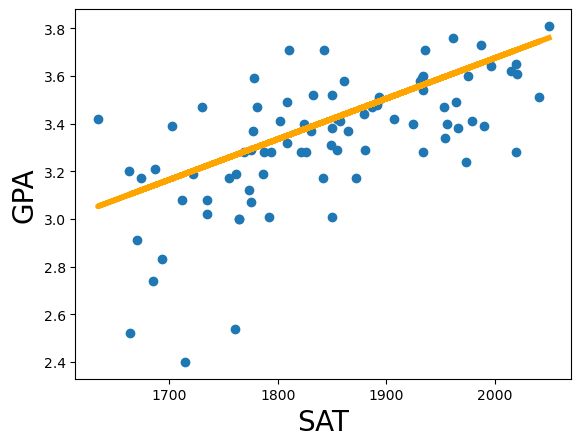

In [9]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Multiple Linear Regression  <a name="MLR"></a>

# Polynomial Regression  <a name="PR"></a>

# Support Vector for Regression (SVR) <a name="SVR"></a>

# Decision Tree Regression  <a name="DecisionTreeRegression"></a>

# Random Forest Regression  <a name="RandomForestRegression"></a>